In [43]:
# Importar bibliotecas en esta celda
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [44]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [45]:
df = pd.read_csv('./estimaciones.csv', parse_dates=True,delimiter=';', encoding='iso-8859-1')
df.head()

,provincia_id,nom_provincia,departamento_id,nom_depto,cultivo_id,nom_cultivo,campaña_id,campaña,sup_sembrada (hectareas),sup_cosechada(hectarea),produccion (toneladas),rendimiento (kg /ha)
0,6,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3.0,3.0,10,3.333
1,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15.0,15.0,82,5.467
2,6,BUENOS AIRES,21,ALBERTI,1,Ajo,1,1969/1970,5.0,5.0,7,1.400
3,6,BUENOS AIRES,28,ALMIRANTE BROWN,1,Ajo,1,1969/1970,2.0,2.0,8,4.000
4,6,BUENOS AIRES,77,ARRECIFES,1,Ajo,1,1969/1970,6.0,6.0,15,2.500


In [46]:
precipitaciones = pd.read_csv('./precipitaciones.csv', parse_dates=True,delimiter=',', encoding='utf-8')
precipitaciones = precipitaciones.loc[:, ['Ano','M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12','Total']]

In [47]:
precipitaciones

,Ano,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Total
0,2017,64.7,172.4,82.0,"88,7","54,8","69,1","26,9","107,5","69,9",43.0,56.0,"34,5","873,7"
1,2016,193.5,133.0,3.0,122.5,54.5,32,30.5,12,28.4,114.0,57.0,58,838.4
2,2015,203.0,118.0,95.5,123,27,2,38,17.5,73.5,127.0,51.5,150.5,1026.5
3,2014,39.5,86.0,49.0,141.3,62.7,13.4,53.5,69,76.6,276.0,67.5,29.0,963.5
4,2013,60.3,3.0,61.0,89.5,4.0,0.0,40.8,0.0,90.0,51.0,39.5,15.0,454.1
5,2012,123.5,103.5,104.5,28.0,59.5,2.8,0.0,98.5,37.5,122.5,77.0,147.5,904.8
6,2011,185.2,33.3,59.0,57.0,22.5,18.8,14.0,15.5,0.8,97.8,193.5,14.0,711.4
7,2010,40.7,109.4,57.4,2.8,10.7,19.2,15.2,1.8,100.5,51.4,57.0,7.8,473.9
8,2009,9.0,23.0,65.5,0.0,19.2,0.2,24.0,2.5,55.0,8.5,71.5,194.5,472.9
9,2008,84.5,76.9,75.2,5.2,14.0,10.0,23.5,13.0,47.0,54.2,12.0,59.0,474.5


In [48]:
#df_trigo = df.loc[(df.nom_cultivo == 'Trigo') & (df.nom_depto == 'PUAN')].copy()
df_cultivo = df.loc[(df.nom_depto == 'PUAN')].copy()

In [49]:
df_cultivo['campaña'] = df_cultivo['campaña'].str.split('/')

In [50]:
df_cultivo['inicio'] = df_cultivo['campaña'].apply(lambda x : int(x[0]))

In [51]:
df_cultivo['final'] = df_cultivo['campaña'].apply(lambda x : int(x[1]))

In [52]:
df_cultivo = df_cultivo.loc[(df_cultivo.inicio >= 1998) & (df_cultivo.inicio <= 2017)]

In [53]:
df_cultivo

,provincia_id,nom_provincia,departamento_id,nom_depto,cultivo_id,nom_cultivo,campaña_id,campaña,sup_sembrada (hectareas),sup_cosechada(hectarea),produccion (toneladas),rendimiento (kg /ha),inicio,final
96589,6,BUENOS AIRES,651,PUAN,5,Avena,30,"[1998, 1999]",23.000,6.000,9.600,1.600,1998,1999
96725,6,BUENOS AIRES,651,PUAN,9,Cebada cervecera,30,"[1998, 1999]",12.000,12.000,21.600,1.800,1998,1999
96770,6,BUENOS AIRES,651,PUAN,10,Cebada forrajera,30,"[1998, 1999]",600.000,200.000,360,1.800,1998,1999
96806,6,BUENOS AIRES,651,PUAN,12,Centeno,30,"[1998, 1999]",700.000,200.000,300,1.500,1998,1999
96924,6,BUENOS AIRES,651,PUAN,14,Girasol,30,"[1998, 1999]",24.000,24.000,28.800,1.200,1998,1999
97264,6,BUENOS AIRES,651,PUAN,32,Maiz,30,"[1998, 1999]",2.500,1.700,5.300,3.118,1998,1999
97581,6,BUENOS AIRES,651,PUAN,20,Mijo,30,"[1998, 1999]",1.000,300.000,450,1.500,1998,1999
97778,6,BUENOS AIRES,651,PUAN,25,Soja,30,"[1998, 1999]",100.000,100.000,150,1.500,1998,1999
98127,6,BUENOS AIRES,651,PUAN,26,Sorgo,30,"[1998, 1999]",3.500,2.500,5.000,2.000,1998,1999
98464,6,BUENOS AIRES,651,PUAN,28,Trigo,30,"[1998, 1999]",121.300,121.300,220.000,1.814,1998,1999


In [54]:
print(len(precipitaciones), len(df_cultivo))

20 220


In [55]:
df_cultivo = df_cultivo.merge(precipitaciones, left_on='inicio', right_on='Ano', how='left')

In [56]:
df_cultivo.head()

,provincia_id,nom_provincia,departamento_id,nom_depto,cultivo_id,nom_cultivo,campaña_id,campaña,sup_sembrada (hectareas),sup_cosechada(hectarea),produccion (toneladas),rendimiento (kg /ha),inicio,final,Ano,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Total
0,6,BUENOS AIRES,651,PUAN,5,Avena,30,"[1998, 1999]",23.0,6.0,9.600,1.6,1998,1999,1998,214.4,254.4,20.4,101.0,31.0,9.8,2.4,22.6,47.2,5.8,116.2,63.0,888.2
1,6,BUENOS AIRES,651,PUAN,9,Cebada cervecera,30,"[1998, 1999]",12.0,12.0,21.600,1.8,1998,1999,1998,214.4,254.4,20.4,101.0,31.0,9.8,2.4,22.6,47.2,5.8,116.2,63.0,888.2
2,6,BUENOS AIRES,651,PUAN,10,Cebada forrajera,30,"[1998, 1999]",600.0,200.0,360,1.8,1998,1999,1998,214.4,254.4,20.4,101.0,31.0,9.8,2.4,22.6,47.2,5.8,116.2,63.0,888.2
3,6,BUENOS AIRES,651,PUAN,12,Centeno,30,"[1998, 1999]",700.0,200.0,300,1.5,1998,1999,1998,214.4,254.4,20.4,101.0,31.0,9.8,2.4,22.6,47.2,5.8,116.2,63.0,888.2
4,6,BUENOS AIRES,651,PUAN,14,Girasol,30,"[1998, 1999]",24.0,24.0,28.800,1.2,1998,1999,1998,214.4,254.4,20.4,101.0,31.0,9.8,2.4,22.6,47.2,5.8,116.2,63.0,888.2


In [57]:
df_cultivo.dtypes

provincia_id                  int64
nom_provincia                object
departamento_id               int64
nom_depto                    object
cultivo_id                    int64
nom_cultivo                  object
campaña_id                    int64
campaña                      object
sup_sembrada (hectareas)    float64
sup_cosechada(hectarea)     float64
produccion (toneladas)       object
rendimiento (kg /ha)        float64
inicio                        int64
final                         int64
Ano                           int64
M1                          float64
M2                          float64
M3                          float64
M4                           object
M5                           object
M6                           object
M7                           object
M8                           object
M9                           object
M10                         float64
M11                         float64
M12                          object
Total                       

In [58]:
df_cultivo['rendimiento (kg /ha)']

0      1.600
1      1.800
2      1.800
3      1.500
4      1.200
5      3.118
6      1.500
7      1.500
8      2.000
9      1.814
10     1.615
11     0.000
12     1.400
13     1.600
14     1.400
15     1.300
16     1.100
17     0.000
18     3.000
19     1.800
20     0.000
21     2.000
22     2.533
23     1.021
24     1.000
25     0.000
26     2.200
27     2.800
28     2.500
29     2.500
       ...  
190    3.400
191    2.602
192    2.700
193    3.000
194    3.000
195    2.800
196    2.000
197    2.300
198    4.500
199    1.200
200    2.451
201    3.500
202    3.187
203    3.000
204    2.500
205    3.800
206    2.200
207    1.100
208    5.500
209    1.200
210    2.476
211    3.000
212    2.800
213    2.900
214    2.500
215    3.700
216    2.000
217    1.400
218    3.000
219    3.000
Name: rendimiento (kg /ha), Length: 220, dtype: float64

In [59]:
df_cultivo['inicio']

0      1998
1      1998
2      1998
3      1998
4      1998
5      1998
6      1998
7      1998
8      1998
9      1998
10     1998
11     1999
12     1999
13     1999
14     1999
15     1999
16     1999
17     1999
18     1999
19     1999
20     1999
21     1999
22     1999
23     1999
24     1999
25     2000
26     2000
27     2000
28     2000
29     2000
       ... 
190    2014
191    2014
192    2014
193    2015
194    2015
195    2015
196    2015
197    2015
198    2015
199    2015
200    2015
201    2015
202    2015
203    2015
204    2016
205    2016
206    2016
207    2016
208    2016
209    2016
210    2016
211    2016
212    2016
213    2016
214    2017
215    2017
216    2017
217    2017
218    2017
219    2017
Name: inicio, Length: 220, dtype: int64

In [60]:
df_cultivo['Total']

0       888.2
1       888.2
2       888.2
3       888.2
4       888.2
5       888.2
6       888.2
7       888.2
8       888.2
9       888.2
10      888.2
11      910.2
12      910.2
13      910.2
14      910.2
15      910.2
16      910.2
17      910.2
18      910.2
19      910.2
20      910.2
21      910.2
22      910.2
23      910.2
24      910.2
25      746.0
26      746.0
27      746.0
28      746.0
29      746.0
        ...  
190     963.5
191     963.5
192     963.5
193    1026.5
194    1026.5
195    1026.5
196    1026.5
197    1026.5
198    1026.5
199    1026.5
200    1026.5
201    1026.5
202    1026.5
203    1026.5
204     838.4
205     838.4
206     838.4
207     838.4
208     838.4
209     838.4
210     838.4
211     838.4
212     838.4
213     838.4
214     873,7
215     873,7
216     873,7
217     873,7
218     873,7
219     873,7
Name: Total, Length: 220, dtype: object

In [61]:
df_cultivo.at[7, 'rendimiento (kg /ha)'] = 0.8
df_cultivo.at[10, 'rendimiento (kg /ha)'] = 0.8
df_cultivo.at[11, 'rendimiento (kg /ha)'] = 0.806

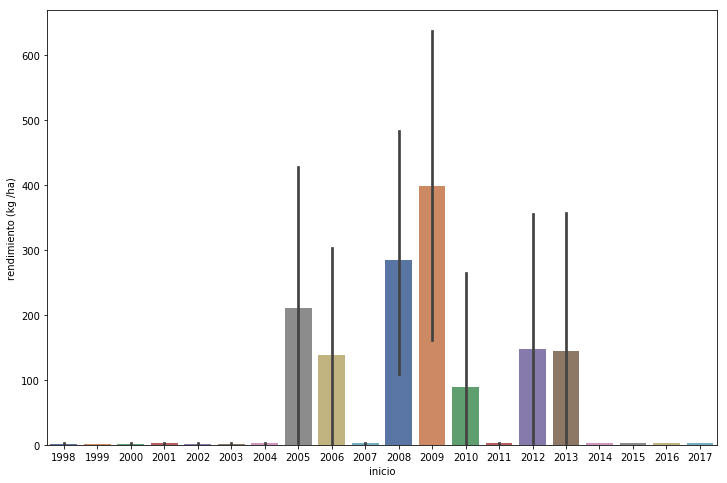

In [62]:
sns.barplot(x=df_cultivo['inicio'], y=df_cultivo['rendimiento (kg /ha)'], palette="deep")

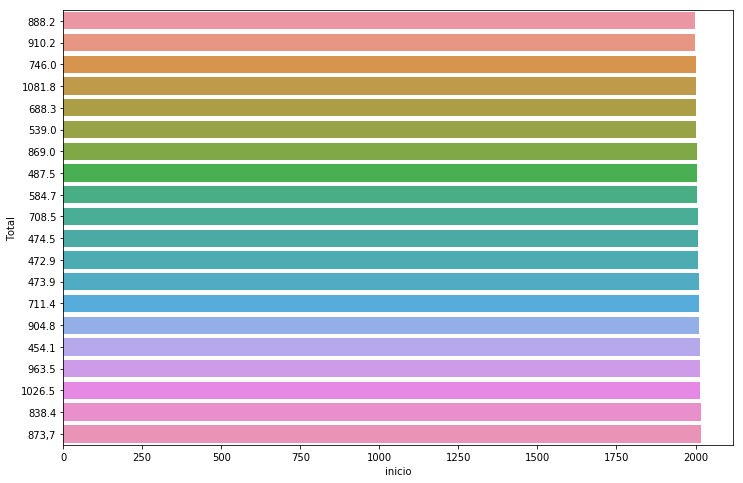

In [63]:
#sns.barplot(x=df_trigo['inicio'], y=df_trigo['Total'], palette="deep")
sns.barplot(x="inicio", y="Total", data=df_cultivo)